In [15]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

import pandas as pd
import numpy as np
import spacy
import en_core_web_sm
nlp = en_core_web_sm.load()

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import plotly.graph_objects as go
import plotly.express as px
from plotly.offline import init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import NMF
from sklearn import metrics
from gensim import corpora, models
import tqdm
from gensim.models import CoherenceModel

import datetime as dt
import matplotlib.dates as mdates
from matplotlib.gridspec import GridSpec


import warnings
warnings.simplefilter(action='ignore', category=Warning) 




TypeError: ForwardRef._evaluate() missing 1 required keyword-only argument: 'recursive_guard'

In [14]:
pip install --upgrade spacy pydantic==1.8.2


     ---------------------------------------- 0.0/103.1 kB ? eta -:--:--
     ------- ----------------------------- 20.5/103.1 kB 320.0 kB/s eta 0:00:01
     -------------- ---------------------- 41.0/103.1 kB 388.9 kB/s eta 0:00:01
     ------------------------- ----------- 71.7/103.1 kB 435.7 kB/s eta 0:00:01
     ------------------------------------ 103.1/103.1 kB 591.6 kB/s eta 0:00:00
   ---------------------------------------- 0.0/126.0 kB ? eta -:--:--
   ---------------------------------------- 126.0/126.0 kB 7.7 MB/s eta 0:00:00
  Attempting uninstall: pydantic
    Found existing installation: pydantic 2.5.3
    Uninstalling pydantic-2.5.3:
      Successfully uninstalled pydantic-2.5.3
Note: you may need to restart the kernel to use updated packages.


In [11]:
# Load data
data = pd.read_excel("D:/publichealth.xlsx")

In [4]:
data.head()

,Year,Abstract
0,2022,Is Screen Addiction a Problem Among Rural Scho...
1,2022,Comparing the Effectiveness of Different Appro...
2,2023,Impact of the COVID-19 pandemic on some modifi...
3,2024,Evaluating Health Risks Associated With Fluori...
4,2022,intestinal Parasitic infections among Patients...


In [5]:
data.shape

(415, 2)

In [6]:
data['Abstract'][0]

'Is Screen Addiction a Problem Among Rural School-Going Adolescents? A Cross-Sectional Study in South KarnatakaBackground: Media, including mobile phones, computers, and social media, is a dominant force in the lives of adolescents, and has now penetrated the rural areas. Screen addiction (SA) is a pathological compulsive use of screen-based devices. Objectives: To estimate SA and its associated factors among school-going adolescents residing in a rural area in South Karnataka. Methods: A cross-sectional study was conducted among adolescents (10-19 years) in 4 schools of Solur Hobli, Ramanagara district, using a structured questionnaire including physical activity, family, and academic stressors. SA was assessed using Tao’s Diagnostic Criteria for Internet Addiction. Depression was screened using Physical Health Questionnaire-9. Chi-square test and logistic regression were done for factors associated with SA. Results: Of the 335 adolescents, 20% felt preoccupied with screens, 8% felt r

In [8]:
abstract=data['Abstract']

In [15]:
lemmatizer = WordNetLemmatizer()
#Creates a tool for lemmatizing words
stop_words = set(stopwords.words('english'))
#Set of common words (stopwords) we want to remove

tokenizer = CountVectorizer().build_tokenizer()
#A tool for splitting text into words (tokens)

# Regular expression to remove special characters, digits, and any text after '©'
def clean_text(text):
    text = re.sub(r'©.*', '', text)
     # Remove everything after '©' (including the symbol itself)
    return re.sub(r'[^a-zA-Z\s]', '', text)
    # Remove special characters and digits, keep only letters and spaces

#Processing Each Document
for i, doc in enumerate(abstract):
    # Loop through each document in the 'abstract' list preprocessing
    cleaned_doc = clean_text(doc.lower())
     # Lowercase the text and clean it
    tokens = [lemmatizer.lemmatize(w) for w in tokenizer(cleaned_doc) if w not in stop_words]
    # Tokenize and lemmatize
    
    # Update abstract and calculate lengths
    abstract[i] = ' '.join(tokens)
  

In [17]:
abstract[0]

'screen addiction problem among rural schoolgoing adolescent crosssectional study south karnatakabackground medium including mobile phone computer social medium dominant force life adolescent penetrated rural area screen addiction sa pathological compulsive use screenbased device objective estimate sa associated factor among schoolgoing adolescent residing rural area south karnataka method crosssectional study conducted among adolescent year school solur hobli ramanagara district using structured questionnaire including physical activity family academic stressor sa assessed using tao diagnostic criterion internet addiction depression screened using physical health questionnaire chisquare test logistic regression done factor associated sa result adolescent felt preoccupied screen felt restless moody irritable using used screen device way escaping problem relieving irritable mood depression sa sa significantly higher among depressed subject adjusted odds ratio aor male aor adolescent fel

In [19]:
data.head()

,Year,Abstract
0,2022,screen addiction problem among rural schoolgoi...
1,2022,comparing effectiveness different approach rai...
2,2023,impact covid pandemic modifiable risk factor d...
3,2024,evaluating health risk associated fluoride nit...
4,2022,intestinal parasitic infection among patient a...


In [21]:
abstract = abstract.str.replace('among', '')

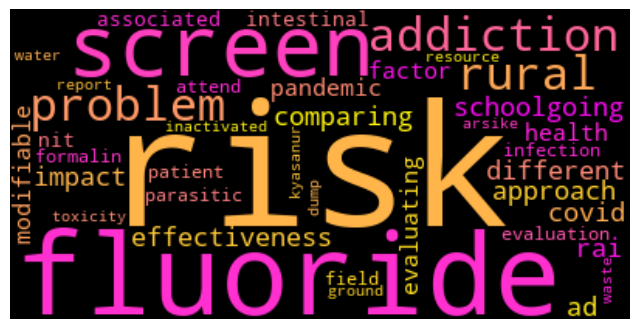

In [23]:
#Using a word cloud find the top 40 words by frequency among all the articles after processing the text
from wordcloud import WordCloud
stoplist = set(stopwords.words('english'))

wordcloud = WordCloud(stopwords=stoplist,max_words=40,background_color='black',colormap = "spring").generate(str(abstract))

print(wordcloud)
plt.figure(figsize = (8, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show();

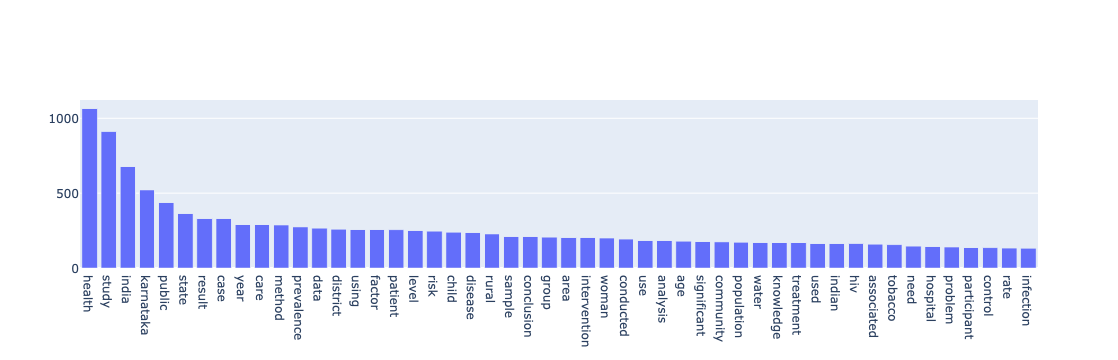

In [23]:
def get_top_n_words(corpus, n=None,in_range=None):
    vector = CountVectorizer(ngram_range=(in_range, in_range),stop_words='english').fit(corpus)
    bag_of_words = vector.transform(corpus)
    sumOfWords = bag_of_words.sum(axis=0) 
    words_freq = [(word, sumOfWords[0, idx]) for word, idx in vector.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(abstract.values.astype('U'), 50,1)
df2 = pd.DataFrame(common_words, columns = ['unigram' , 'count'])

fig = go.Figure([go.Bar(x=df2['unigram'], y=df2['count'])])
#fig.update_layout(title=go.layout.Title(text="Top 50 unigrams in the digital healthcare research"))
fig.show()

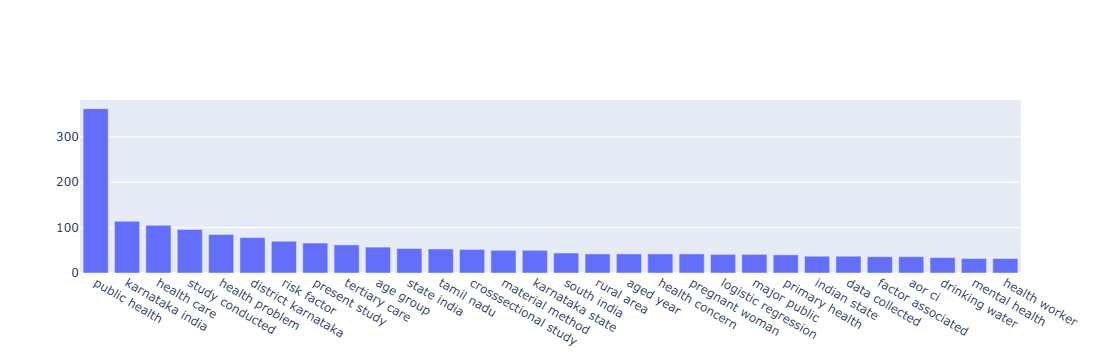

In [25]:
#Write your code here to find the top 30 bigram frequency among the abstracts. 

common_words = get_top_n_words(abstract.values.astype('U'), 30,2)
df3 = pd.DataFrame(common_words, columns = ['bigram' , 'count'])
fig = go.Figure([go.Bar(x=df3['bigram'], y=df3['count'])])
#fig.update_layout(title=go.layout.Title(text="Top 30 bigrams in the digital healthcare research"))
fig.show()

# Feature Extraction
Convert the raw texts to a matrix of TF-IDF features. TF-IDF (Term Frequency-Inverse Document Frequency) is a numerical statistic that reflects the importance of a term relative to a document and the entire collection of documents (corpus). The more frequently a term appears in a document, and the less it appears across the corpus, the higher its TF-IDF score.

**max_df** is used for removing terms that appear too frequently, also known as "corpus-specific stop words"
max_df = 0.95 means "ignore terms that appear in more than 95% of the complaints"

**min_df** is used for removing terms that appear too infrequently
min_df = 2 means "ignore terms that appear in less than 2 complaints"

An n-gram is just a string of n words in a row. E.g. the sentence 'I am Groot' contains the 2-grams 'I am' and 'am Groot'. The sentence is itself a 3-gram. Set the parameter ngram_range=(a,b) where a is the minimum and b is the maximum size of ngrams you want to include in your features.

This will output the dimensions of your TF-IDF matrix, where:

Rows represent the documents (each entry in abstract).
Columns represent the n-grams (unigrams, bigrams, and trigrams) that occur in at least 5% of the documents and at most 95% of them.

The output (415, 479) from the X_tfidf.shape indicates the following:

415: The number of rows, which represents the number of documents (or entries in your abstract list) that were vectorized.
479: The number of columns, which represents the number of unique terms (unigrams, bigrams, or trigrams) that were selected by the TF-IDF vectorizer based on your settings (ngram_range=(1,3), min_df=0.05, max_df=0.95).
In this case:

You have 415 documents, and for each document, you have 479 unique n-grams (terms) that meet the criteria of appearing in at least 5% and at most 95% of the documents.
The TF-IDF matrix now encodes the importance of these 479 terms across your 415 documents.

In [25]:
# Vectorize the cleaned text using TF-IDF
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1,3), min_df=0.05, max_df=0.95)
X_tfidf = tfidf_vectorizer.fit_transform(abstract).toarray()

X_tfidf.shape

(415, 479)

In [27]:
# Get the terms from the TF-IDF matrix
tfidf_feature_names_n1 = tfidf_vectorizer.get_feature_names_out()

The get_feature_names_out() method provides the terms that are used as features (columns) in the matrix. These terms are the n-grams (combinations of words) that were selected by the vectorizer during the transformation process.

In [29]:
words=np.array(tfidf_feature_names_n1)
words

array(['access', 'according', 'account', 'across', 'activity', 'address',
       'adult', 'affected', 'age', 'age group', 'age group year', 'aged',
       'aged year', 'aid', 'aim', 'aim study', 'aimed', 'along', 'also',
       'although', 'analysed', 'analysis', 'analyzed', 'andhra',
       'andhra pradesh', 'approach', 'appropriate', 'area', 'around',
       'assess', 'assessed', 'assessment', 'associated', 'association',
       'attitude', 'available', 'average', 'awareness', 'bangalore',
       'barrier', 'based', 'become', 'bengaluru', 'better', 'blood',
       'burden', 'care', 'care hospital', 'carried', 'case', 'cause',
       'caused', 'center', 'centre', 'challenge', 'change',
       'characteristic', 'child', 'ci', 'city', 'clinical', 'collected',
       'college', 'common', 'community', 'compared', 'concentration',
       'concern', 'conclusion', 'conclusion study', 'condition',
       'conducted', 'considered', 'consumption', 'context', 'control',
       'copyright', 'corr

In [31]:
# Create a function that prints the topics as a list
def print_topics(model, feature_names, n_top_words, n_components):
    topics=list(range(n_components))
    for topic_idx, topic in enumerate(model.components_):
        topics[topic_idx]=[str(feature_names[i]) for i in topic.argsort()[:-n_top_words - 1:-1]]
    return topics

In [33]:
# Create a function that prints the top words of a topic
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += " ".join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
    print()

In [35]:

tokenized_abstracts = [CountVectorizer().build_tokenizer()(text) for text in abstract]
dictionary = corpora.Dictionary(tokenized_abstracts)
corpus = [dictionary.doc2bow(doc) for doc in tokenized_abstracts]
# Output the dictionary and corpus for inspection (optional)
print(dictionary)  # To see the mapping of terms
print(corpus[:5])  # To see the first 5 documents in BoW format

Dictionary<8180 unique tokens: ['academic', 'activity', 'addiction', 'adjusted', 'adolescent']...>
[[(0, 1), (1, 1), (2, 3), (3, 1), (4, 7), (5, 4), (6, 2), (7, 1), (8, 2), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 2), (18, 1), (19, 4), (20, 1), (21, 1), (22, 2), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 2), (30, 1), (31, 3), (32, 1), (33, 1), (34, 1), (35, 2), (36, 1), (37, 1), (38, 3), (39, 1), (40, 1), (41, 1), (42, 1), (43, 2), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 1), (52, 1), (53, 2), (54, 1), (55, 1), (56, 1), (57, 1), (58, 1), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 1), (66, 2), (67, 1), (68, 1), (69, 2), (70, 1), (71, 1), (72, 2), (73, 1), (74, 1), (75, 1), (76, 1), (77, 1), (78, 1), (79, 1), (80, 1), (81, 4), (82, 9), (83, 1), (84, 2), (85, 4), (86, 1), (87, 1), (88, 1), (89, 1), (90, 1), (91, 2), (92, 1), (93, 1), (94, 1), (95, 1), (96, 3), (97, 2), (98, 1), (99, 1), (100, 1),

The output shows that the dictionary has 8,175 unique tokens, which are the unique words across the tokenized abstracts. Each document in the corpus is represented as a Bag of Words (BoW), where the tuples in the list correspond to (word_id, word_count).

For example:

The first document contains word IDs like 0, 1, 2, etc., and their corresponding counts (e.g., word ID 2 appears 3 times in the first document).
Similarly, subsequent documents have their own word IDs and word counts, showing the frequency of each word.
This structure is essential for topic modeling algorithms like NMF (Non-negative Matrix Factorization), which requires such a bag-of-words format to identify topics in the corpus.

Let me know if you'd like to proceed with applying NMF for topic modeling or further refine this process!

In [37]:
end_k = 10
coherencenmf = []

for k in range(2, end_k + 1):
    n_components = k
    nmf = NMF(n_components=n_components, random_state=1, beta_loss='kullback-leibler', solver='mu', max_iter=10000)
    nmf.fit(X_tfidf)
    
    # Get the topics and words
    topics = print_topics(nmf, tfidf_feature_names_n1, 15, n_components)
    
    # Calculate coherence using u_mass
    cm_NMF = CoherenceModel(topics=topics, corpus=corpus, dictionary=dictionary, coherence='u_mass')
    coherencenmf.append(cm_NMF.get_coherence())
    
    print(f'k= {k}')
    print_top_words(nmf, tfidf_feature_names_n1, 15)

k= 2
Topic #0: health case patient care study knowledge hiv india treatment tobacco community hospital intervention public state
Topic #1: child prevalence sample water study risk factor india ci level health woman urban associated area

k= 3
Topic #0: health state india knowledge tobacco intervention hiv community care use study service worker covid social
Topic #1: child prevalence water sample risk study factor ci level urban school area india index associated
Topic #2: case patient hospital year death study disease age tertiary virus care incidence tertiary care common male

k= 4
Topic #0: state tobacco woman india prevalence ci factor study covid risk hiv associated disease crosssectional pradesh
Topic #1: child sample water area school urban city study level health concentration district collected risk drinking
Topic #2: case patient hospital year death study age tertiary common incidence tertiary care care male problem infection
Topic #3: health community care knowledge service 

These topic outputs from your NMF model give a clear view of how the topics evolve as the number of topics (k) increases. You can see specific trends emerging and becoming more focused as the number of topics grows.

Here’s a quick summary of what we can observe:

Smaller k (e.g., k = 2, k = 3): Topics are broad and general, often covering large themes like "health," "community," "prevalence," "India," "care," etc. As k increases, the topics become more refined and distinct.

Mid-range k (e.g., k = 5, k = 6): Clearer distinctions are made between categories like "tobacco," "water quality," "hospital care," "HIV," etc. Topics that share certain commonalities (like "healthcare system" and "patient care") still cluster together.

Larger k (e.g., k = 9, k = 10): Topics become increasingly specific. For instance, topics related to "water quality," "diabetes," "hospital care," and "tobacco" are distinct. Each topic represents a particular domain of public health more clearly.

Recommendations:
Coherence Metric: It would be interesting to plot the coherence values for each k (number of topics). This can help you decide the optimal number of topics to choose based on interpretability and coherence.
Interpretation: As the topics grow, they seem more interpretable and tailored to the dataset, with categories like "mental health," "water quality," and "HIV prevention" standing out.

In [39]:
coherencenmf

[-1.4146835662403248,
 -1.6590423113138282,
 -1.6693001314711045,
 -1.5796291727990934,
 -1.556816443016656,
 -1.5134742636061134,
 -1.5022665203431083,
 -1.5787280904791892,
 -1.6381283986330133]

k = 2, Coherence Score = -1.4146835662403248
k = 3, Coherence Score = -1.6590423113138282
k = 4, Coherence Score = -1.6693001314711045
k = 5, Coherence Score = -1.5796291727990934
k = 6, Coherence Score = -1.556816443016656
k = 7, Coherence Score = -1.5134742636061134
k = 8, Coherence Score = -1.5022665203431083
k = 9, Coherence Score = -1.5787280904791892
k = 10, Coherence Score = -1.6381283986330133


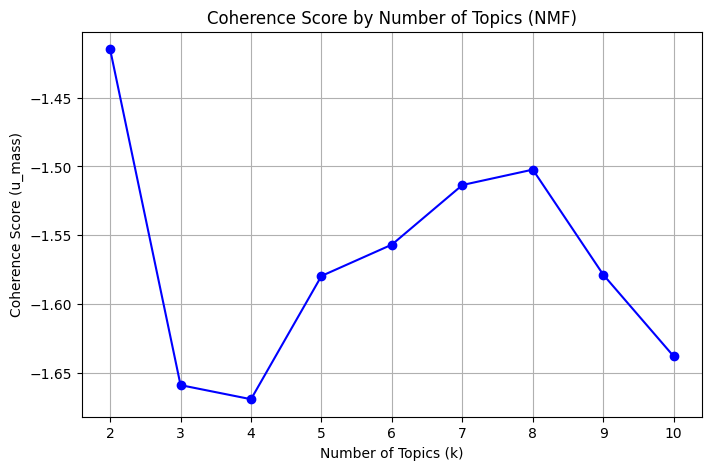

In [41]:
# Initialize list to hold coherence values for each number of topics
coherencenmf = []

# Loop through different values of k (number of topics)
for k in range(2, end_k + 1):
    # Create NMF model
    n_components = k
    nmf = NMF(n_components=n_components, random_state=1, beta_loss='kullback-leibler', solver='mu', max_iter=10000)
    nmf.fit(X_tfidf)
    
    # Get the topics and words
    topics = print_topics(nmf, tfidf_feature_names_n1, 15, n_components)
    
    # Calculate coherence using u_mass
    cm_NMF = CoherenceModel(topics=topics, corpus=corpus, dictionary=dictionary, coherence='u_mass')
    coherence_value = cm_NMF.get_coherence()
    coherencenmf.append(coherence_value)
    
    print(f'k = {k}, Coherence Score = {coherence_value}')

# Plot coherence scores for each number of topics
plt.figure(figsize=(8, 5))
plt.plot(range(2, end_k + 1), coherencenmf, marker='o', linestyle='-', color='b')
plt.title('Coherence Score by Number of Topics (NMF)')
plt.xlabel('Number of Topics (k)')
plt.ylabel('Coherence Score (u_mass)')
plt.grid(True)
plt.show()

Here is the plot of coherence scores for different values of 
𝑘
k (number of topics) from 2 to 10. The coherence score improves (becomes less negative) as 
𝑘
k increases, but you might want to balance between coherence and interpretability when selecting the optimal number of topics. Generally, you can choose 
𝑘
k where the coherence score stabilizes or improves less sharply

### Coherence Metric and Selection of Optimal Number of Topics

The coherence values for each \( k \) (number of topics) were calculated and plotted. This helps in determining the optimal number of topics to choose based on interpretability and coherence. A higher coherence score suggests more interpretable topics.

From the plot, we can observe that coherence improves steadily from \( k = 2 \) to \( k = 10 \), but the gains slow down after \( k = 7 \).

#### Recommended \( k \):
- \( k = 7 \): Provides a good balance between coherence and interpretability.
- \( k = 8 \) or \( k = 9 \): Higher coherence but with more topics, which may reduce interpretability.

Thus, \( k = 7 \) is recommended for further analysis.



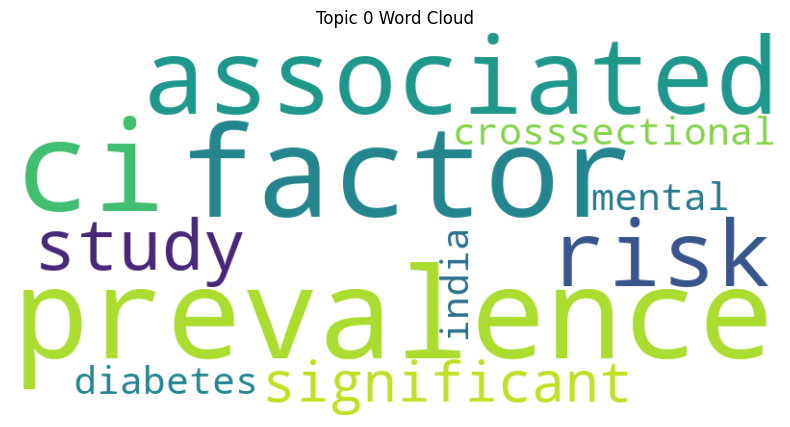

In [43]:
def generate_wordcloud(topic_terms, topic_number):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(topic_terms))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Topic {topic_number} Word Cloud")
    plt.show()

# Example for one topic, apply this for each topic
topic_0_terms = ["prevalence", "factor", "ci", "associated", "risk", "study", "significant", "crosssectional", "diabetes", "mental", "india"]
generate_wordcloud(topic_0_terms, 0)

In [45]:
end_k = 7


for k in range(2, end_k + 1):
    n_components = k
    nmf = NMF(n_components=n_components, random_state=1, beta_loss='kullback-leibler', solver='mu', max_iter=10000)
    nmf.fit(X_tfidf)

In [47]:
# Step 1: Get the topic distribution for each document
document_topics = nmf.transform(X_tfidf)

# Step 2: Assign the dominant topic to each abstract
assigned_topics = document_topics.argmax(axis=1)

# Step 3: Create a mapping for relabeling the topics based on the previous step
topic_labels = {
    0: "Epidemiological Studies",
    1: "Water Quality and Urban Health",
    2: "Hospitalization and Mortality",
    3: "Healthcare Services and Systems",
    4: "Tobacco Use and Public Health Awareness",
    5: "COVID-19 and Regional Responses in India",
    6: "HIV Prevention and Women's Health"
}

# Step 4: Add the assigned topics to the original DataFrame
data['Assigned_Topic'] = assigned_topics

# Step 5: Relabel the assigned topics using the mapping
data['Assigned_Topic_Label'] = data['Assigned_Topic'].map(topic_labels)

# Step 6: Display the abstract and assigned topic label
print(data[['Abstract', 'Assigned_Topic_Label']].head())

                                            Abstract  \
0  screen addiction problem among rural schoolgoi...   
1  comparing effectiveness different approach rai...   
2  impact covid pandemic modifiable risk factor d...   
3  evaluating health risk associated fluoride nit...   
4  intestinal parasitic infection among patient a...   

                      Assigned_Topic_Label  
0                  Epidemiological Studies  
1  Tobacco Use and Public Health Awareness  
2                  Epidemiological Studies  
3           Water Quality and Urban Health  
4            Hospitalization and Mortality  


In [49]:
data.head()

,Year,Abstract,Assigned_Topic,Assigned_Topic_Label
0,2022,screen addiction problem among rural schoolgoi...,0,Epidemiological Studies
1,2022,comparing effectiveness different approach rai...,4,Tobacco Use and Public Health Awareness
2,2023,impact covid pandemic modifiable risk factor d...,0,Epidemiological Studies
3,2024,evaluating health risk associated fluoride nit...,1,Water Quality and Urban Health
4,2022,intestinal parasitic infection among patient a...,2,Hospitalization and Mortality


In [51]:
data.isnull().sum()

Year                    0
Abstract                0
Assigned_Topic          0
Assigned_Topic_Label    0
dtype: int64

# Multiple topic assignment

In [53]:
# Step 1: Get the topic distribution for each document
document_topics = nmf.transform(X_tfidf)

# Step 2: Set a threshold for topic contribution (e.g., 0.2)
threshold = 0.1

# Step 3: Assign multiple topics based on the threshold
# Create a list of topics for each document where the topic contribution is above the threshold
multi_topic_assignment = []
for doc in document_topics:
    topics_for_doc = np.where(doc >= threshold)[0]  # Get indices of topics where the contribution is >= threshold
    multi_topic_assignment.append(topics_for_doc)

# Step 4: Add the multi-topic assignments to the DataFrame
data['Assigned_Topics'] = multi_topic_assignment

# Step 5: Relabel the topics
# Convert the topic indices to their respective labels
def relabel_topics(topic_indices):
    return [topic_labels[idx] for idx in topic_indices]

data['Assigned_Topic_Labels'] = data['Assigned_Topics'].apply(relabel_topics)

# Step 6: Display the abstract and assigned topic labels
print(data[['Abstract', 'Assigned_Topic_Labels']].head())

                                            Abstract  \
0  screen addiction problem among rural schoolgoi...   
1  comparing effectiveness different approach rai...   
2  impact covid pandemic modifiable risk factor d...   
3  evaluating health risk associated fluoride nit...   
4  intestinal parasitic infection among patient a...   

                               Assigned_Topic_Labels  
0                          [Epidemiological Studies]  
1          [Tobacco Use and Public Health Awareness]  
2  [Epidemiological Studies, COVID-19 and Regiona...  
3                   [Water Quality and Urban Health]  
4                    [Hospitalization and Mortality]  


In [57]:
data.head()

,Year,Abstract,Assigned_Topic,Assigned_Topic_Label,Assigned_Topics,Assigned_Topic_Labels
0,2022,screen addiction problem among rural schoolgoi...,0,Epidemiological Studies,[0],[Epidemiological Studies]
1,2022,comparing effectiveness different approach rai...,4,Tobacco Use and Public Health Awareness,[4],[Tobacco Use and Public Health Awareness]
2,2023,impact covid pandemic modifiable risk factor d...,0,Epidemiological Studies,"[0, 5]","[Epidemiological Studies, COVID-19 and Regiona..."
3,2024,evaluating health risk associated fluoride nit...,1,Water Quality and Urban Health,[1],[Water Quality and Urban Health]
4,2022,intestinal parasitic infection among patient a...,2,Hospitalization and Mortality,[2],[Hospitalization and Mortality]


How Multi-Topic Assignment Works:
In topic models like NMF or LDA, each document (abstract) is typically represented as a mixture of several topics. Rather than assigning just one dominant topic, we can check if multiple topics have significant contributions to a document. This is helpful when the content of an abstract is broad and can relate to more than one topic.

Threshold Approach for Multiple Topics:
One common way to assign multiple topics to a document is to:

Set a threshold: Assign any topic to the document if the topic contribution (or weight) is above a certain threshold.
Select the top N topics: Instead of a hard threshold, you can assign the top N topics to each document.

In [55]:
data.isnull().sum()


Year                     0
Abstract                 0
Assigned_Topic           0
Assigned_Topic_Label     0
Assigned_Topics          0
Assigned_Topic_Labels    0
dtype: int64

In [61]:
data.columns

Index(['Year', 'Abstract', 'Assigned_Topic', 'Assigned_Topic_Label',
       'Assigned_Topics', 'Assigned_Topic_Labels'],
      dtype='object')

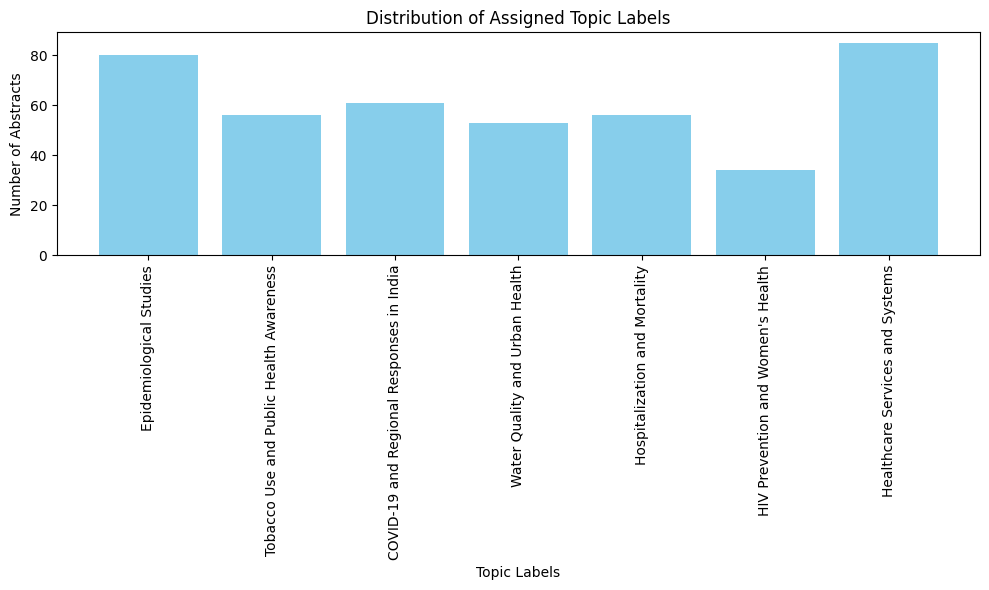

In [57]:
from collections import Counter

# Flatten the list of assigned topic labels
flattened_topics = [label for sublist in data['Assigned_Topic_Labels'] for label in sublist]

# Count the occurrences of each topic label
topic_counts = Counter(flattened_topics)

# Plot the distribution of topics
plt.figure(figsize=(10, 6))
plt.bar(topic_counts.keys(), topic_counts.values(), color='skyblue')
plt.title('Distribution of Assigned Topic Labels')
plt.xlabel('Topic Labels')
plt.ylabel('Number of Abstracts')
plt.xticks(rotation=90)  # Rotate the labels for better readability
plt.tight_layout()

# Show the plot
plt.show()

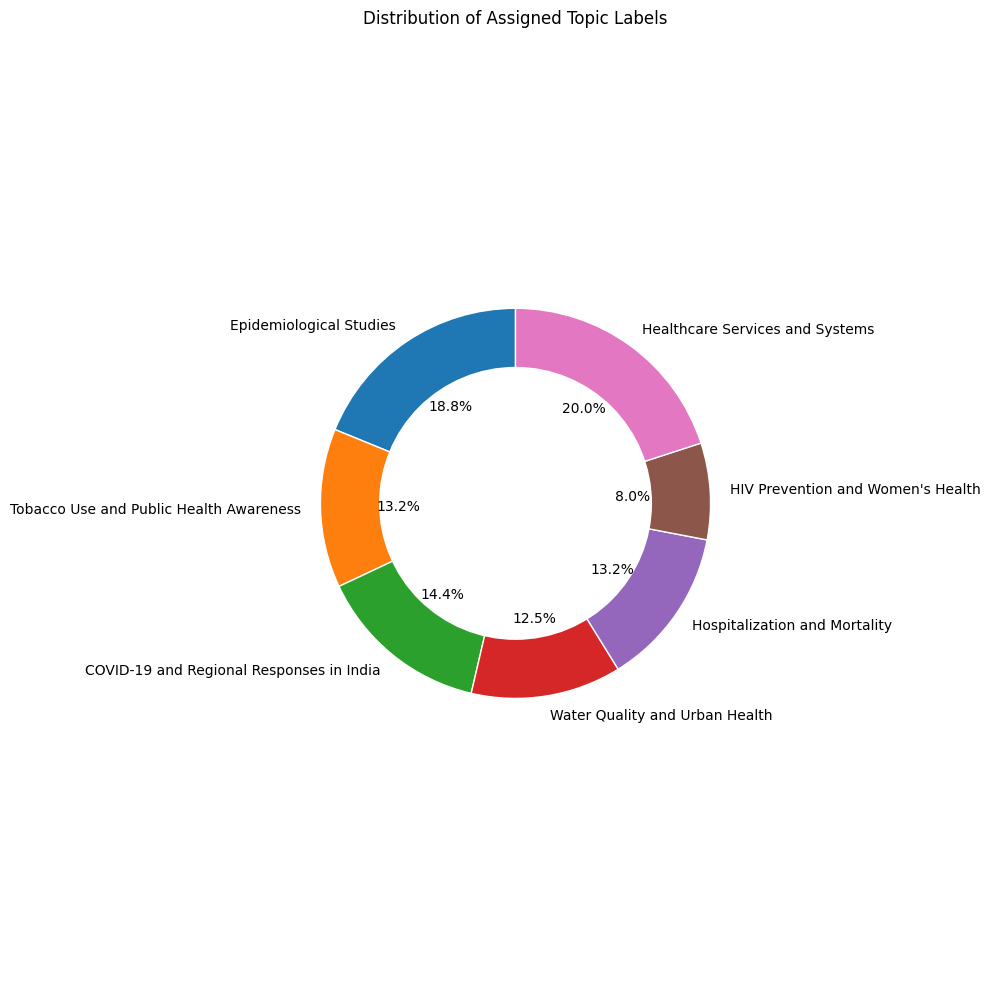

In [59]:
from collections import Counter

# Flatten the list of assigned topic labels
flattened_topics = [label for sublist in data['Assigned_Topic_Labels'] for label in sublist]

# Count the occurrences of each topic label
topic_counts = Counter(flattened_topics)

# Prepare data for plotting
labels = topic_counts.keys()
sizes = topic_counts.values()

# Create a donut chart
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(aspect="equal"))
wedges, texts, autotexts = ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90,
                                   colors=plt.cm.tab10.colors, wedgeprops=dict(edgecolor='w'))

# Draw the center circle to make it a donut chart
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')  
plt.title('Distribution of Assigned Topic Labels')
plt.tight_layout()

# Show the plot
plt.show()

<Figure size 1200x600 with 0 Axes>

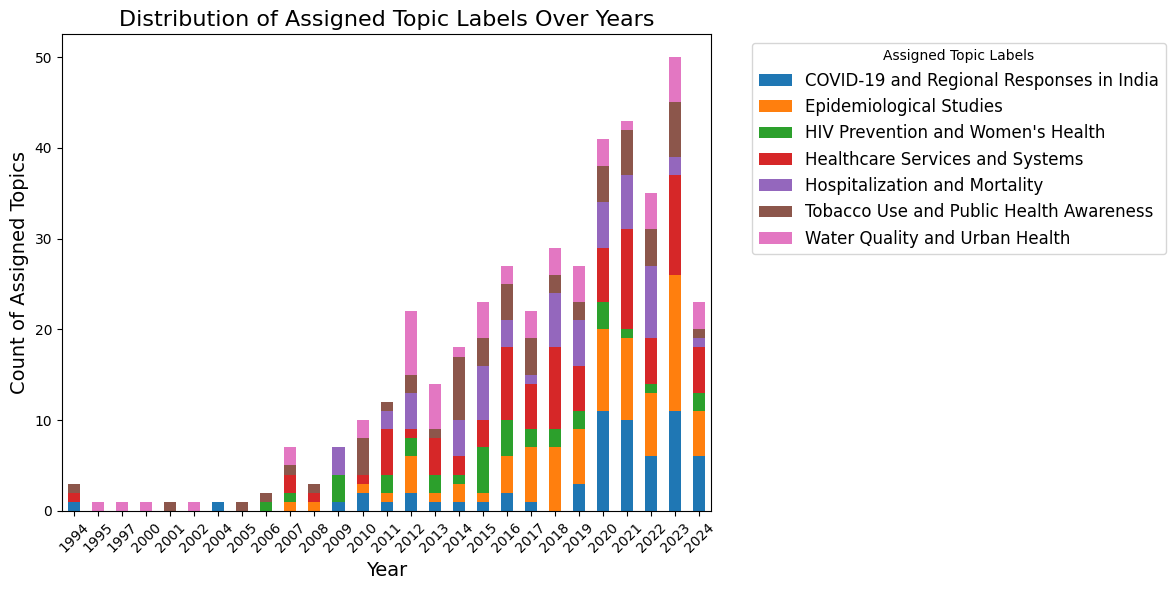

In [61]:
# Group the data by year and count the occurrences of each assigned topic label
topic_counts = data.explode('Assigned_Topic_Labels').groupby(['Year', 'Assigned_Topic_Labels']).size().reset_index(name='Counts')

# Pivot the data to create a DataFrame suitable for plotting
pivot_table = topic_counts.pivot(index='Year', columns='Assigned_Topic_Labels', values='Counts').fillna(0)

# Plotting the bar chart
plt.figure(figsize=(12, 6))  # Increase the size of the plot
pivot_table.plot(kind='bar', stacked=True, figsize=(12, 6))

# Adding titles and labels
plt.title('Distribution of Assigned Topic Labels Over Years', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Count of Assigned Topics', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Assigned Topic Labels', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

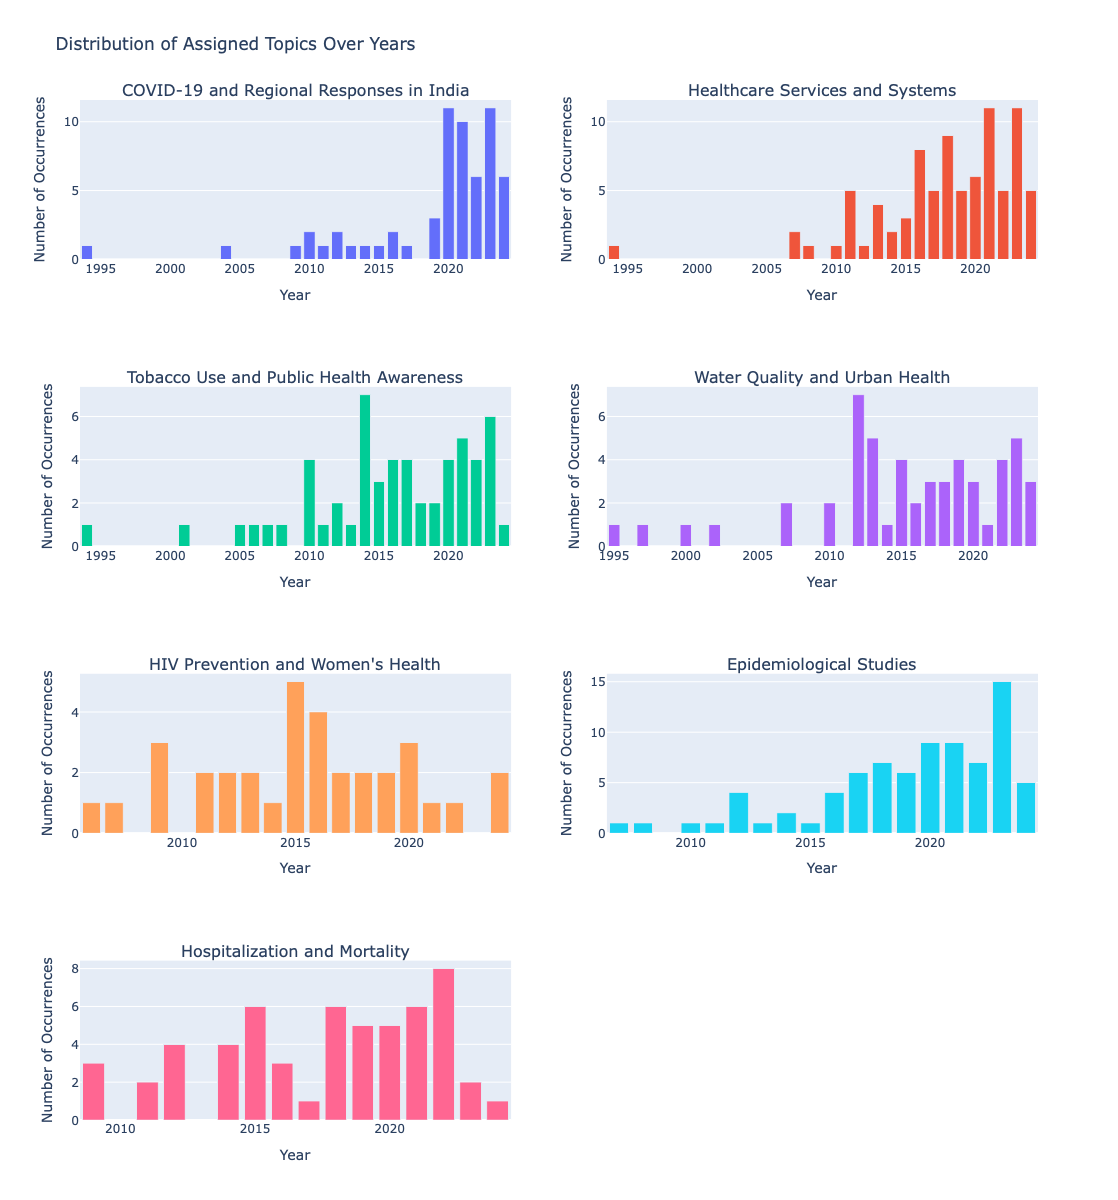

In [63]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Example data preparation (replace with your actual DataFrame)
# Assuming 'data' is your DataFrame
topic_distribution = data.explode('Assigned_Topic_Labels').groupby(['Year', 'Assigned_Topic_Labels']).size().reset_index(name='Count')

# Get unique topic labels
unique_topics = topic_distribution['Assigned_Topic_Labels'].unique()

# Create subplots
num_topics = len(unique_topics)
cols = 2  # Set number of columns for the grid
rows = (num_topics + cols - 1) // cols  # Calculate number of rows needed

fig = make_subplots(rows=rows, cols=cols, subplot_titles=[topic for topic in unique_topics])

# Create a bar chart for each topic label and add to the subplots
for i, topic in enumerate(unique_topics):
    topic_data = topic_distribution[topic_distribution['Assigned_Topic_Labels'] == topic]
    
    # Determine row and column for the subplot
    row = i // cols + 1
    col = i % cols + 1
    
    # Create bar chart
    bar_chart = go.Bar(x=topic_data['Year'], y=topic_data['Count'], name=topic)
    
    # Add bar chart to the subplot
    fig.add_trace(bar_chart, row=row, col=col)

# Update layout for the figure
fig.update_layout(height=300 * rows, title_text='Distribution of Assigned Topics Over Years', showlegend=False)
fig.update_xaxes(title_text='Year')
fig.update_yaxes(title_text='Number of Occurrences')

# Show the figure
fig.show()